This notebook contains the analysis of the javascript models performances

#Imports


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import sys
sys.path.append('/content/gdrive/MyDrive/TFE_crowd_counting/CSRNet-pytorch')

import os
from image import *
from model import CSRNet
import glob
import matplotlib.pyplot as plt
import torch
import numpy as np
import matplotlib.pyplot as plt
#!pip install matplotlib==3.4

Mounted at /content/gdrive


#Data

In [ ]:
#ordre dans les tuples (image de shanagai, image barb, image A10)
res = ['113x86','256x192','340x257','512x384']

real_people_number = [90,14,281]
SHA_1024x768_results = [84,20,244] #taken in python #(time in js 1600 sec)
SHAS_1024x768_results = [234,200,610] #taken in python
A10_1024x768_results = [78,19,278] #not real results, must be redone

#SHA_512x384
cpu_cons = []
SHA_512x384_times = [342,362,321]
SHA_512x384_results = [80,17,178]

#SHA_340x257
cpu_cons = []
SHA_340x257_times = [173,203,175]
SHA_340x257_results = [75,22,84]

#SHA_256x192
cpu_cons = []
SHA_256x192_times = [111,97,102]
SHA_256x192_results = [80,29,75]

#SHA_113x86
cpu_cons = []
SHA_113x86_times = [24,18,26]
SHA_113x86_results = [64,8,3]

#SHAS_512x384
cpu_cons = []
SHAS_512x384_times = [431,431,423]
SHAS_512x384_results = [92,39,520]
#SHAS_340x257
cpu_cons = []
SHAS_340x257_times = [168,166,697]
SHAS_340x257_results = [70,81,162]

#SHAS_256x192
cpu_cons = []
SHAS_256x192_times = [100,106,97]
SHAS_256x192_results = [70,155,466]

#SHAS_113x86
cpu_cons = []
SHAS_113x86_times = [19,18,18]
SHAS_113x86_results = [87,35,181]


#A10_SH_512x384
cpu_cons = []
A10_512x384_times = [246,263,231]
A10_512x384_results = [60,7,33]

#A10_340x257
cpu_cons = []
A10_340x257_times = [137,187,131]
A10_340x257_results = [60,7,33]

#A10_256x192
cpu_cons = []
A10_256x192_times = [110,102,96]
A10_256x192_results = [55,4,28]

#A10_113x86
cpu_cons = []
A10_113x86_times = [26,26,26]
A10_113x86_results = [43,1,1]


results = [SHA_113x86_results,SHA_256x192_results,SHA_340x257_results,SHA_512x384_results,SHA_1024x768_results]
results_SHAS = [SHAS_113x86_results,SHAS_256x192_results,SHAS_340x257_results,SHAS_512x384_results,SHAS_1024x768_results]
results_A10 = [A10_113x86_results,A10_256x192_results,A10_340x257_results,A10_512x384_results,A10_1024x768_results]

#Graphs

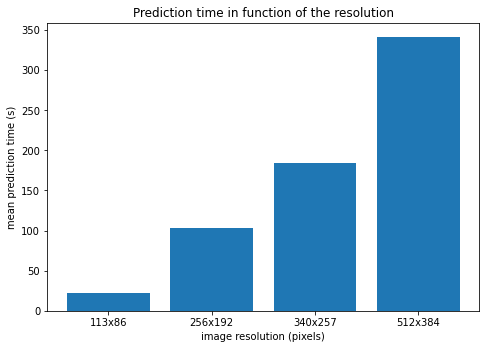

In [ ]:
#Mean timex resolution
times = [np.mean(SHA_113x86_times),np.mean(SHA_256x192_times),np.mean(SHA_340x257_times),np.mean(SHA_512x384_times)]
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(res,times)
ax.set_xlabel('image resolution (pixels)')
ax.set_ylabel('mean prediction time (s)')
ax.set_title('Prediction time in function of the resolution')
plt.show()

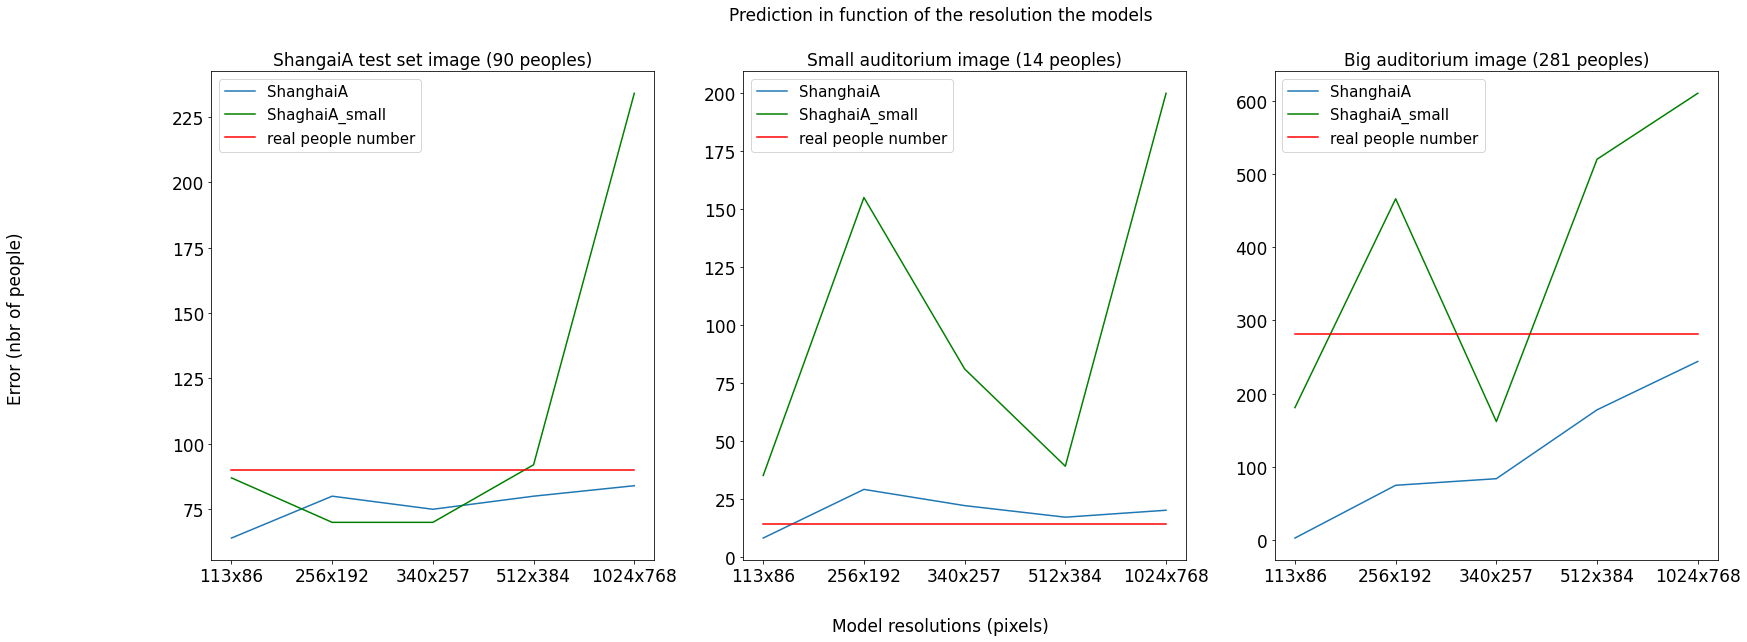

In [ ]:
#prediction of the model
resol = ['113x86','256x192','340x257','512x384','1024x768']
real_pn = [[90,90,90,90,90],[14,14,14,14,14],[281,281,281,281,281]]

fig = plt.figure(figsize=(27,9))
plt.subplot(131)
plt.plot(resol, [abs(x[0]) for x in results], label ="ShanghaiA")
plt.plot(resol, [abs(x[0]) for x in results_SHAS], label ="ShaghaiA_small",color = 'g')
#plt.plot(resol, [abs(x[0]) for x in results_A10], label ="A10_SH")
plt.plot(resol,real_pn[0], label = "real people number",color = 'r')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(prop={'size': 15})
plt.title("ShangaiA test set image (90 peoples)",fontsize=17)
plt.subplot(132)
plt.plot(resol, [abs(x[1]) for x in results], label ="ShanghaiA")
plt.plot(resol, [abs(x[1]) for x in results_SHAS], label ="ShaghaiA_small",color = 'g')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
#plt.plot(resol, [abs(x[1]) for x in results_A10], label ="A10_SH")
plt.plot(resol,real_pn[1], label = "real people number",color = 'r')
plt.legend(prop={'size': 15})
plt.title("Small auditorium image (14 peoples)",fontsize=17)
plt.subplot(133)
plt.plot(resol, [abs(x[2]) for x in results],label = "ShanghaiA")
plt.plot(resol, [abs(x[2]) for x in results_SHAS], label ="ShaghaiA_small",color = 'g')
#plt.plot(resol, [abs(x[2]) for x in results_A10], label ="A10_SH")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.plot(resol,real_pn[2], label = "real people number",color = 'r')
plt.title("Big auditorium image (281 peoples)",fontsize=17)
plt.suptitle('Prediction in function of the resolution the models',fontsize=17)
fig.supxlabel('Model resolutions (pixels)',fontsize=17)
fig.supylabel("Error (nbr of people)",fontsize=17)
plt.legend(prop={'size': 15})
plt.show()

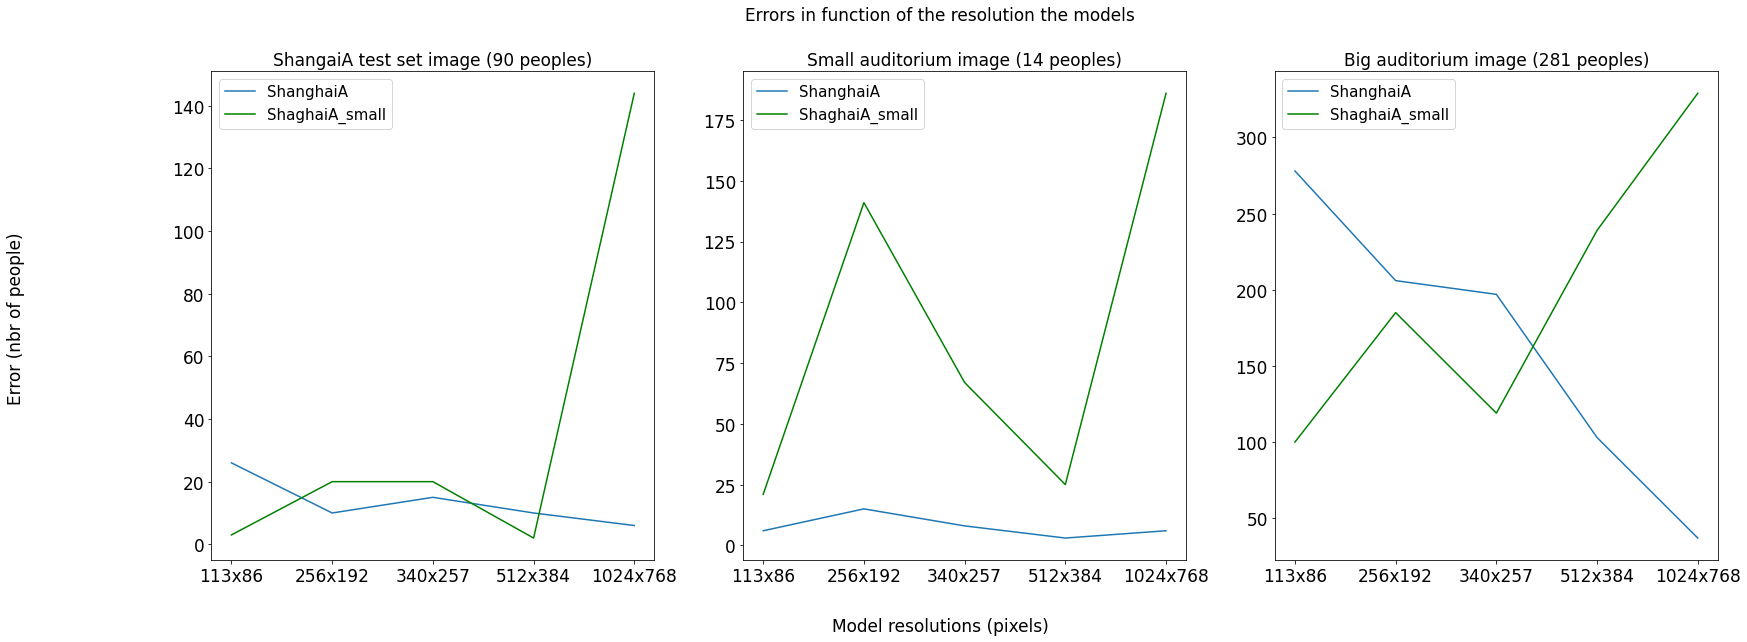

In [ ]:
#prediction of the model
resol = ['113x86','256x192','340x257','512x384','1024x768']
real_pn = [[90,90,90,90,90],[14,14,14,14,14],[281,281,281,281,281]]

fig = plt.figure(figsize=(27,9))
plt.subplot(131)
plt.plot(resol, [abs(x[0]-real_people_number[0]) for x in results], label ="ShanghaiA")
plt.plot(resol, [abs(x[0]-real_people_number[0]) for x in results_SHAS], label ="ShaghaiA_small",color = 'g')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
#plt.plot(resol, [abs(x[0]) for x in results_A10], label ="A10_SH")
#plt.plot(resol,real_pn[0], label = "real people number",color = 'r')
plt.legend(prop={'size': 15})
plt.title("ShangaiA test set image (90 peoples)",fontsize=17)
plt.subplot(132)
plt.plot(resol, [abs(x[1]-real_people_number[1]) for x in results], label ="ShanghaiA")
plt.plot(resol, [abs(x[1]-real_people_number[1]) for x in results_SHAS], label ="ShaghaiA_small",color = 'g')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
#plt.plot(resol, [abs(x[1]) for x in results_A10], label ="A10_SH")
#plt.plot(resol,real_pn[1], label = "real people number",color = 'r')
plt.legend(prop={'size': 15})
plt.title("Small auditorium image (14 peoples)",fontsize=17)
plt.subplot(133)
plt.plot(resol, [abs(x[2]-real_people_number[2]) for x in results],label = "ShanghaiA")
plt.plot(resol, [abs(x[2]-real_people_number[2]) for x in results_SHAS], label ="ShaghaiA_small",color = 'g')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
#plt.plot(resol, [abs(x[2]) for x in results_A10], label ="A10_SH")
#plt.plot(resol,real_pn[2], label = "real people number",color = 'r')
plt.title("Big auditorium image (281 peoples)",fontsize=17)
plt.suptitle('Errors in function of the resolution the models',fontsize=17)
fig.supxlabel('Model resolutions (pixels)',fontsize=17)
fig.supylabel("Error (nbr of people)",fontsize=17)
plt.legend(prop={'size': 15})
plt.show()

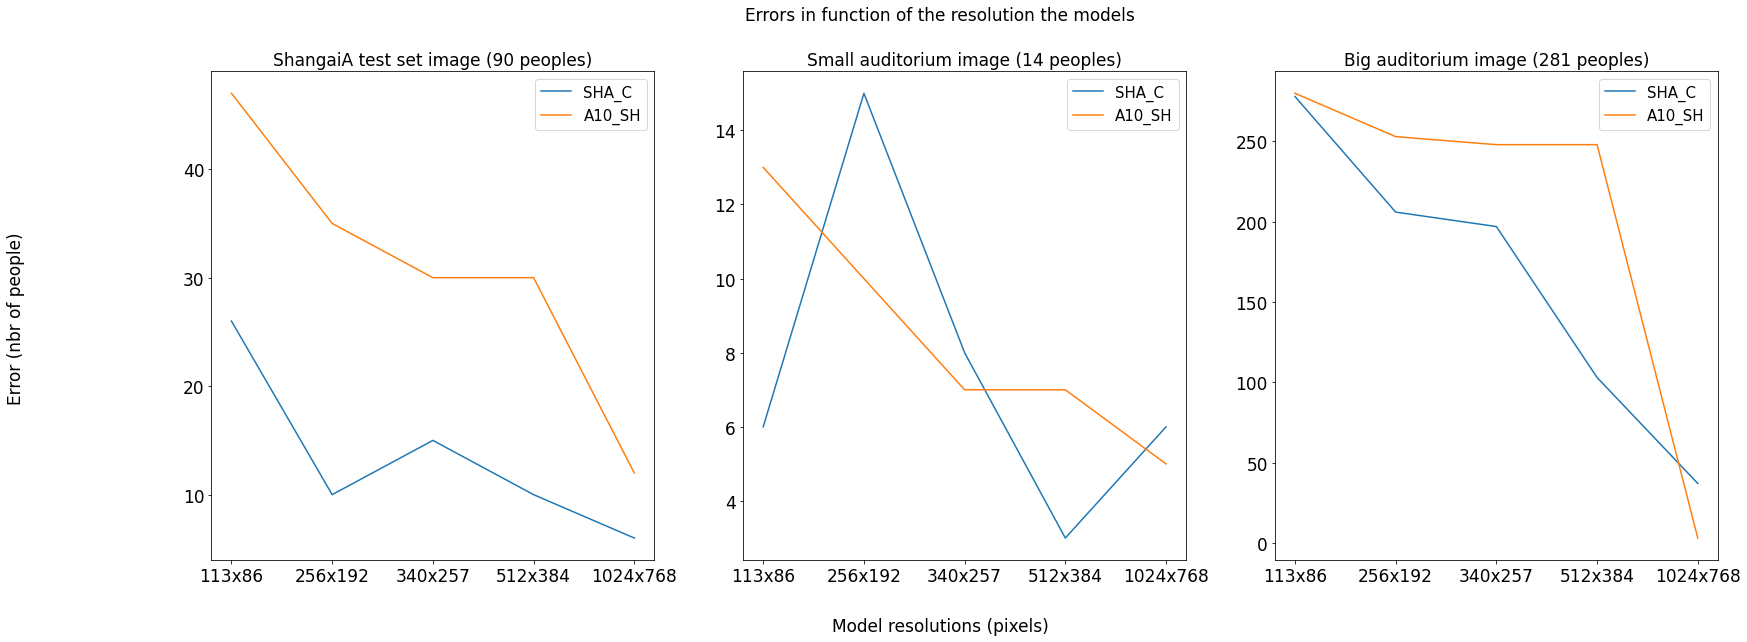

In [ ]:
#precision of the model
resol = ['113x86','256x192','340x257','512x384','1024x768']

fig = plt.figure(figsize=(27,9))
plt.subplot(131)
plt.plot(resol, [abs(x[0]-real_people_number[0]) for x in results], label ="SHA_C")
#plt.plot(resol, [abs(x[0]-real_people_number[0]) for x in results_SHAS], label ="SHAS_C")
plt.plot(resol, [abs(x[0]-real_people_number[0]) for x in results_A10], label ="A10_SH")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(prop={'size': 15})
plt.title("ShangaiA test set image (90 peoples)",fontsize=17)
plt.subplot(132)
plt.plot(resol, [abs(x[1]-real_people_number[1]) for x in results], label ="SHA_C")
#plt.plot(resol, [abs(x[1]-real_people_number[1]) for x in results_SHAS], label ="SHAS_C")
plt.plot(resol, [abs(x[1]-real_people_number[1]) for x in results_A10], label ="A10_SH")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(prop={'size': 15})
plt.title("Small auditorium image (14 peoples)",fontsize=17)
plt.subplot(133)
plt.plot(resol, [abs(x[2]-real_people_number[2]) for x in results],label = "SHA_C")
#plt.plot(resol, [abs(x[2]-real_people_number[2]) for x in results_SHAS], label ="SHAS_C")
plt.plot(resol, [abs(x[2]-real_people_number[2]) for x in results_A10], label ="A10_SH")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(prop={'size': 15})
plt.title("Big auditorium image (281 peoples)",fontsize=17)
plt.suptitle('Errors in function of the resolution the models',fontsize=17)
fig.supxlabel('Model resolutions (pixels)',fontsize=17)
fig.supylabel("Error (nbr of people)",fontsize=17)
plt.show()

#Overfitting study

In [ ]:
#recup les données
files_path = '/content/gdrive/MyDrive/TFE_crowd_counting/CSRNet-pytorch/models/'
def read_MAE(file_name):
  results = []
  losses = []
  loss='25'
  file = open(files_path+file_name, "r")
  for line in file:
    split_line= line.split()
    if len(split_line)>=2 and split_line[1] == 'MAE':
      results.append(float(split_line[2]))
      losses.append(float(loss.replace('(','').replace(')','')))
    if len(split_line) > 1 and split_line[0]== 'Epoch:':
      loss=split_line[-1]
  file.close()
  return results,losses

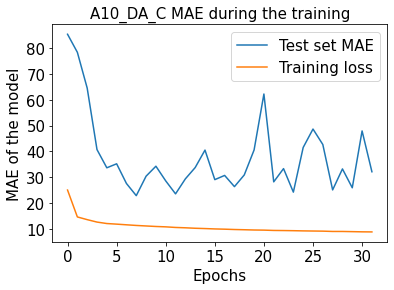

In [ ]:
MAE,loss = read_MAE('MAE_A10_DA_C.txt')
plt.plot(MAE,label='Test set MAE')
plt.plot(loss,label='Training loss')
plt.ylabel('MAE of the model',fontsize='15')
plt.xlabel('Epochs',fontsize='15')
plt.title('A10_DA_C MAE during the training',fontsize='15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15})

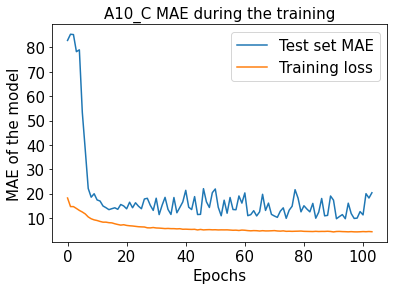

In [ ]:
MAE,loss = read_MAE('MAE_A10_C.txt')
plt.plot(MAE,label='Test set MAE')
plt.plot(loss,label='Training loss')
plt.ylabel('MAE of the model',fontsize='15')
plt.xlabel('Epochs',fontsize='15')
plt.title('A10_C MAE during the training',fontsize='15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15})

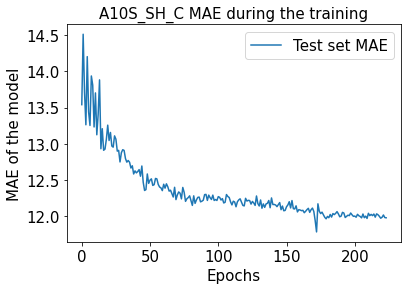

In [ ]:
MAE,loss = read_MAE('logs A10S_SH_C.txt')
plt.plot(MAE,label='Test set MAE')
#plt.plot(loss,label='Training loss')
#plt.ylim(0,15)
plt.ylabel('MAE of the model',fontsize='15')
plt.xlabel('Epochs',fontsize='15')
plt.title('A10S_SH_C MAE during the training',fontsize='15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15})

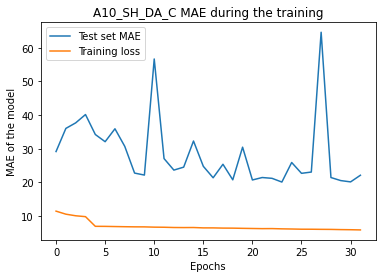

In [ ]:
MAE,loss = read_MAE('log_A10_SH_DA_C.txt')
plt.plot(MAE,label='Test set MAE')
plt.plot(loss,label='Training loss')
plt.ylabel('MAE of the model')
plt.xlabel('Epochs')
plt.title('A10_SH_DA_C MAE during the training')
plt.legend()

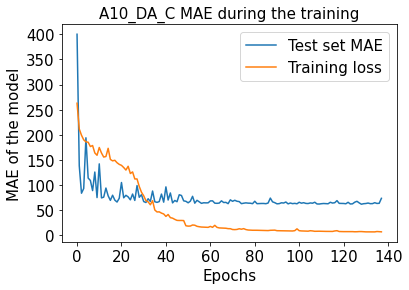

In [ ]:
MAE,loss = read_MAE('MAE_A10xSH_C.txt')
plt.plot(MAE,label='Test set MAE')
plt.plot(loss,label='Training loss')
plt.ylabel('MAE of the model',fontsize='15')
plt.xlabel('Epochs',fontsize='15')
plt.title('A10_DA_C MAE during the training',fontsize='15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15})